In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [4]:
ar = np.r_[1, -0.75, 0.25]
ma = np.r_[1, 0.65, 0.35]
m = sm.tsa.ArmaProcess(ar, ma)

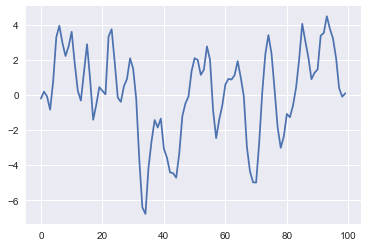

In [7]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

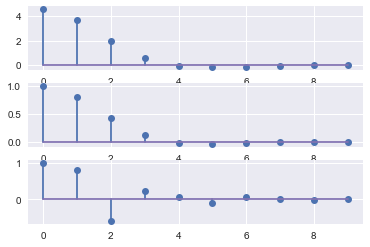

In [9]:
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

In [28]:
m2 = sm.tsa.ARMA(x, (4, 1))

In [29]:
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(4, 1)   Log Likelihood                -145.824
Method:                       css-mle   S.D. of innovations              1.028
Date:                Tue, 14 Aug 2018   AIC                            305.649
Time:                        20:45:26   BIC                            323.885
Sample:                             0   HQIC                           313.029
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1113      0.580      0.192      0.848      -1.025       1.248
ar.L1.y        0.7157      0.169      4.234      0.000       0.384       1.047
ar.L2.y        0.2905      0.215      1.350      0.1

In [34]:
r.forecast(20)[0]

array([0.33988925, 0.47211386, 0.38420113, 0.27411825, 0.15903925,
       0.1331978 , 0.12137986, 0.14226912, 0.13685645, 0.13878042,
       0.1230248 , 0.12131235, 0.11287067, 0.11611822, 0.11260064,
       0.11550482, 0.11230013, 0.11382121, 0.1112927 , 0.11261647])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


ValueError: all the input arrays must have same number of dimensions

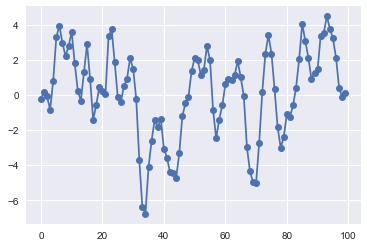

In [17]:
plt.figure(1)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[2]], marker='o')

In [2]:
sm.tsa.ARMA

statsmodels.tsa.arima_model.ARMA